# Design and Analyses of experiments

## Introduction

## Simple Comparitive Experiments

### Import code

In [86]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [14]:
portland_mortar_rows = [
    { 'modified_mortar': 16.85, 'unmodified_mortar': 16.62},
    { 'modified_mortar': 16.40, 'unmodified_mortar': 16.75},
    { 'modified_mortar': 17.21, 'unmodified_mortar': 17.37},
    { 'modified_mortar': 16.35, 'unmodified_mortar': 17.12},
    { 'modified_mortar': 16.52, 'unmodified_mortar': 16.98},
    { 'modified_mortar': 17.04, 'unmodified_mortar': 16.87},
    { 'modified_mortar': 16.96, 'unmodified_mortar': 17.34},
    { 'modified_mortar': 17.15, 'unmodified_mortar': 17.02},
    { 'modified_mortar': 16.59, 'unmodified_mortar': 17.08},
    { 'modified_mortar': 16.57, 'unmodified_mortar': 17.27},
]
df = pd.DataFrame(portland_mortar_rows)

In [16]:
df['modified_mortar'].values

array([16.85, 16.4 , 17.21, 16.35, 16.52, 17.04, 16.96, 17.15, 16.59,
       16.57])

In [23]:

def resample(vals, size):
    opt = []
    for _ in range(size):
        opt.append(random.choice(vals))
#     print('l', len(opt))
    return opt
        

### Raw Data

In [100]:
df.head(100)

,modified_mortar,unmodified_mortar
0,16.85,16.62
1,16.40,16.75
2,17.21,17.37
3,16.35,17.12
4,16.52,16.98
5,17.04,16.87
6,16.96,17.34
7,17.15,17.02
8,16.59,17.08
9,16.57,17.27


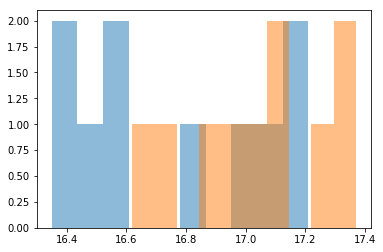

In [28]:
fig, ax = plt.subplots(1,1)
ax.hist(df['modified_mortar'].values, alpha=0.5)
ax.hist(df['unmodified_mortar'].values, alpha=0.5)
_ = 10

### Sampling and Sampling Distributions

__Discrete__  

$y_{discrete}:  0 \le p(y_j) \le 1; \forall y_j $
  
$\sum_{\forall y_j} p(y_j) = 1$

__Continuous__  

$y_{continuous}: p(a\le y\le b) = \int_{a}^{b} f(y) \space dy$  

$\int_{-\infty}^{\infty} f(y) \space dy$  



#### Mean, Variance, Expected Value

#####  Mean and Expected Value

__Discrete__  
$$\mu = E(y) = \sum_{all \space y}y \space p(y)\$$

__Continuous__  

$$ \mu = E(y) = \int_{-\infty}^{\infty} y \space f(y)$$
  
  
##### Variance
__Discrete__
$$\sigma^2 = V(y) = E[(y-\mu)^2]$$

   
##### Other Results
1. $E(constant) = constant$  
2. $E(y) = \mu$  
3. $E(c\space y) = c \mu$  
4. $V(constant) = 0$  
5. $V(y) = \sigma^2$
6. $V(cy) = c^2\sigma^2$
7. $E(y_1 + y_2) = \mu_1 + \mu_2$
8. $V(y_1 + y_2) = V(y_1) + V(y_2) + 2 Cov(y_1, y_2)$
    * $Cov(y_1, y_2) = E[(y_1 - \mu_1) (y_2 - \mu_2)]$
9. $V(y_1 - y_2) = V(y_1) + V(y_2) - 2 Cov(y_1, y_2)$   
10. $V(y_1 \pm y_2) =  V(y_1) + V(y_2)$, when $y_1$ and $y_2$ are independent
11. $E(y_1 \cdot y_2) = E(y_1)\cdot E(y_2) = \mu_1 \cdot \mu_2$
12. $E\left( \frac{y_1}{y_2} \right)  \ne \frac{E(y_1)}{E(y_2}$

#### Inference


* The objective of statistical inference is to draw conclusions about a population using a sample from that population. 
* Most of the methods that we will study assume that random samples are used. 
* Statistic is any function on the observed sample that does not have any unknown parameters
$$sample \space mean = \bar{y} = \frac{\sum_{i=1}^{n} y_i}{n}$$  
$$sample \space variance = S^2 = \frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{n-1}$$  

In general, an __estimator__ of an unknown parameter is a statistic that corresponds to that parameter. The point estimator is also a random variable. A particular numerical value of an estimator computed from sample data is called an __estimate__. 

Two important properties of an estimator are: 
1. Point estimator is unbiased. The long-run average or expected value of the point estimator should be equal to the parameter that is being estimated. 
2. An unbiased estimator should have minimum variance. The property states that minimum variance point estimator has a variance that is smaller than the variance of any other estimator of that parameter.   
  
$\bar{y}$ is an unbiased estimator of $\mu$:  

$E(\bar{y}) = E\left( \frac{\sum_{i=1}^n y_i}{n}\right)$  
$E(\bar{y}) = \frac{1}{n}\sum_{i=1}^n E(y_i)$  
$E(\bar{y}) = \frac{1}{n}\sum_{i=1}^n \mu$  
$E(\bar{y}) = \mu$  
  
Consider sample variance:  

$E(S^2) = E\left[ \frac{\sum_{i=1}^n (y_i - \bar{y})^2}{n-1} \right]$  
$E(S^2) = \frac{1}{n-1}E\left[ \sum_{i=1}^n (y_i - \bar{y})^2 \right]$  
$E(S^2) = \frac{1}{n-1}E\left[ \sum_{i=1}^n y_i^2 + \bar{y}^2 - 2\sum y_i\bar{y}\right]$  
$E(S^2) = \frac{1}{n-1}E\left[ \sum_{i=1}^n y_i^2 + \bar{y}^2 - 2\bar{y} n\bar{y} \right]$  
$E(S^2) = \frac{1}{n-1}E\left[ \sum_{i=1}^n y_i^2 - n\bar{y}^2 \right]$  
$E(S^2) = \frac{1}{n-1}\sum_{i=1}^n (\mu^2 + \sigma^2) - n(\mu^2 + \sigma^2/n)$  
$E(S^2) = \frac{1}{n-1}(n-1)\sigma^2$  


#### Common Probability Distributions


##### Normal Distribution  

$$f(y) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} [(y-\mu)/\sigma]^2}$$
$$-\infty <\mu <+\infty \space ; \space \sigma^2 > 0$$  

Standard Normal Distribution = $\mathcal{N} (0,1)$, where $\mu=0$, $\sigma=1$

$$z=\frac{y-\mu}{\sigma}$$  

##### Chi-Square Distribution
$$\chi = z_1^2 + z_2^2 + ... + z_k^2$$  
If $z_1, z_2, . . . , z_k$ are normally and independently distributed random variables with mean 0 and variance 1, abbreviated NID(0, 1). 

$$f(x) = \frac{1}{2^{k/2} \Gamma \left( \frac{k}{2}\right) } x^{k/2} e^{-x/2}$$
$$x>0$$
##### t-distribution
$$t_k = \frac{z}{\sqrt{\chi_k^2 / k}}$$  
$$f(t) = \frac{\Gamma[(k+1)/2]}{\sqrt{k \pi}\space \Gamma(k/2)} \frac{1}{[t^2/k + 1]^{(k+1)/2}}$$  
If $y_1, y_2, ...y_n$ is a random sample from the $\mathcal{N}(\mu,\sigma^2)$
$$t = \frac{\bar{y} - \mu}{S/\sqrt{n}}$$
##### F distribution  

$$F_{u, \nu} = \frac{X_u^2/u}{X_{\nu}^2/\nu}$$  
$$h(x) = \frac{\Gamma\left( \frac{u+\nu}{2} \right) \left( \frac{u}{\nu} \right)^{u/2} x^{u/2 - 1} }{\Gamma\left( \frac{u}{\nu} \right) \Gamma\left( \frac{\nu}{2} \right) \left[ \frac{u}{\nu} x + 1\right]^{(u +\nu)/2}}$$  
As an example of a statistic that is distributed as F, suppose we have two independent normal populations with common variance $\sigma^2$. If $y_{11}, y_{12}, . . . , y_{1n}$ is a random sample of $n_1$ observations from the first population, and if $y_{21}, y_{22}, . . . , y_{2n}$ is a random sample of $n_2$ observations from the second, then

$$\frac{S_1^2}{S_2^2} \sim F_{n_1-1, n_2-1}$$


The __Two-Sample t-Test__. 
Suppose that we could assume that the variances of tension bond strengths were identical for both mortar formulations. Then the appropriate test statistic to use for comparing two treatment means in the completely randomized design is

$$t_0 = \frac{\bar{y_1} - \bar{y_2}}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$  
$$S_p = \frac{(n_1 - 1)S_1^2 + (n_2 -1)S_2^2}{n_1 + n_2 - 2}$$  

### Inferences About the Differences in Means, Randomized Designs

In [146]:
def sample_variance(sample):
    m = np.mean(sample)
    s = 0.0
    for val in sample:
        s += np.power(val-m,2)
    return s / (len(sample) - 1)

def pooled_sample_variance(sample1, sample2):

    n1, n2 = len(sample1), len(sample2)
    s1, s2 = sample_variance(sample1), sample_variance(sample2)
    sp = np.sqrt(((n1-1) * s1 + (n2-1) * s2 ) / (n1+n2-2))
    return sp

def ttest_eq_var_two_tail(sample1, sample2, alpha=0.05):
    
    n_s1, n_s2 = len(sample1), len(sample2)
    
    # calculate t-statistic
    diff = (np.mean(sample1) - np.mean(sample2))*1.0
    std_err = (pooled_sample_variance(sample1, sample2)*np.sqrt(1.0/n_s1 + 1.0/n_s2))
    t_stat = diff / std_err

    # calculate margin of error
    t_standard = stats.t.ppf(1-alpha/2.0, n1+n2 -2)    
    psv = pooled_sample_variance(sample1, sample2)
    margin = t_standard * psv * np.sqrt(1.0/n_s1 + 1.0/n_s2)

    l_ci, u_ci = diff - margin, diff + margin
    
    # calculate p value
    p_val = stats.t.sf(np.abs(t_stat), n_s1+n_s2-1)*2
    
    return t_stat, l_ci, u_ci, p_val


Null hypothesis is that the modified and the unmodified mortar have the same bond strength. 
$$H_0: \mu_{mod} = \mu_{unmod}$$
$$H_1: \mu_{mod} \ne \mu_{unmod}$$
  
Assuming equal variance, and random sample:
$$t_0 = \frac{\bar{y}_1 - \bar{y}_2 }{S_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

In [153]:
rows = []
for sample, name in zip([y1, y2], ['modified', 'unmodified']):
    row = { 
        'treatment': name, 'N': len(sample), 
        'mean': np.mean(sample),  
        'std_dev': np.sqrt(sample_variance(sample)),
        #'se_mean': np.sqrt(sample_variance(sample)/len(sample))
    }
    rows.append(row)
    
pd.DataFrame(rows).set_index('treatment')

,N,mean,std_dev
treatment,,,
modified,10,16.764,0.316446
unmodified,10,17.042,0.247916


In [147]:
y1 = df['modified_mortar'].values
y2 = df['unmodified_mortar'].values

t_stat, low_ci, up_ci, p_val = ttest_eq_var_two_tail(y1, y2)

print('t-statistic {:.4f} [{:.4f}, {:.4f}], p value: {:.4f}'.format(t_stat, low_ci, up_ci, p_val))

t-statistic -2.1869 [-0.5451, -0.0109], p value: 0.0415


**Checking Assumptions in the t-Test. **

In using the t-test procedure we make the assumptions that 
1. **both samples are random samples that are drawn from independent populations that can be described by a normal distribution**, and that 
2. **the standard deviation or variances of both populations are equal.**

The assumption of independence is critical, and if the run order is randomized (and, if appropriate, other experimental units and materials are selected at random), this assumption will usually be satisfied. The equal variance and normality assumptions are easy to check using a normal probability plot.

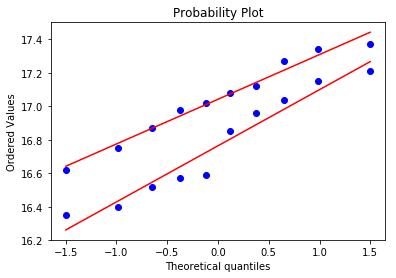

In [99]:
fig, ax = plt.subplots(1,1)
_ = stats.probplot(y1, plot=plt)
_ = stats.probplot(y2, plot=plt)

If this assumption is violated, you should use the version of the t-test described in Two-Sample t-test with unequal variance. The supplemental text material has more information about checking assumptions on the t-test.



**The Use of P-Values in Hypothesis Testing.**   
One way to report the results of a hypothesis test is to state that the null hypothesis was or was not rejected at a specified p-value or level of significance. This is often called fixed significance level testing. For example, in the Portland cement mortar formulation above, we can say that H0 : $\mu_1 = \mu_2$ was rejected at the 0.05 level of significance. 
This statement of conclusions is often inadequate because it gives the decision maker no idea about whether the computed **value of the test statistic was just barely in the rejection region or whether it was very far into this region**. Furthermore, stating the results this way **imposes the predefined level of significance** on other users of the information. This approach may be unsatisfactory because some decision makers might be uncomfortable with the risks implied by $\alpha=$0.05.

**p-value definition:**  

To avoid these difficulties, the p-value approach has been adopted widely in practice. 
* The p-value is the probability that the test statistic will take on a value that is at least as extreme as the observed value of the statistic when the null hypothesis $H_0$ is true. 
* More **formally**, we define the P-value as the smallest level of significance that would lead to rejection of the null hypothesis $H_0$.

Thus, a p-value conveys much information about the weight of evidence against H0, and so a decision maker can draw a conclusion at any specified level of significance. 

It is customary to call the test statistic (and the data) significant when the null hypoth- esis H0 is rejected; 

therefore, we may think of the p-value as the smallest level $\alpha$ at which the data are significant. Once the p-value is known, the decision maker can determine how significant the data are without the data analyst formally imposing a preselected level of significance.


When assumptions are badly violated, the performance of the t-test will be affected. Generally, small to moderate violations of assumptions are not a major concern, but any **failure of the independence assumption** and strong indications of **non-normality** should not be ignored. 

Both the **significance level of the test** and the **ability to detect differences between the means** will be adversely affected by departures from assumptions. 

**How to solve?**  
1. Transformations are one approach to dealing with this problem. 
2. Nonparametric hypothesis testing procedures can also be used if the observations come from non-normal populations

In [158]:
norm_flu_rows = [
    { 'nerve': 6625, 'muscle': 3900},
    { 'nerve': 6000, 'muscle': 3500},
    { 'nerve': 5450, 'muscle': 3450},
    { 'nerve': 5200, 'muscle': 3200},
    { 'nerve': 5175, 'muscle': 2980},
    { 'nerve': 4900, 'muscle': 2800},
    { 'nerve': 4750, 'muscle': 2500},
    { 'nerve': 4500, 'muscle': 2400},
    { 'nerve': 3985, 'muscle': 2200},
    { 'nerve': 900, 'muscle': 1200},
    { 'nerve': 450, 'muscle': 1150},
    { 'nerve': 2800, 'muscle': 1130},
]
df = pd.DataFrame(norm_flu_rows)
df

,muscle,nerve
0,3900,6625
1,3500,6000
2,3450,5450
3,3200,5200
4,2980,5175
5,2800,4900
6,2500,4750
7,2400,4500
8,2200,3985
9,1200,900


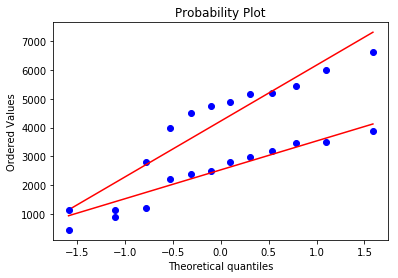

In [163]:
fig, ax = plt.subplots(1,1)
_ = stats.probplot(df['nerve'], plot=plt)
_ = stats.probplot(df['muscle'], plot=plt)

Null hypothesis is that the modified and the unmodified mortar have the same bond strength. 
$$H_0: \mu_{mod} = \mu_{unmod}$$
$$H_1: \mu_{mod} \ne \mu_{unmod}$$
  
Assuming unequal variance, and random sample:
$$t_0 = \frac{\bar{y}_1 - \bar{y}_2 }{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}$$

$$df = \frac{\left( \frac{S_1^2}{n_1} + \frac{S_2^2}{n_2} \right)^2}{\frac{(S_1^2/n_1)^2}{n_1 - 1} + \frac{(S_2^2/n_2)^2}{n_2 - 1}}$$

In [210]:
def degree_of_freedom(sample1, sample2):
    n_s1, n_s2 = len(sample1), len(sample2)
    s1, s2 = sample_variance(sample1), sample_variance(sample2)
    
    nr = np.power(s1/n_s1 + s2/n_s2, 2)
    dr = np.power(s1/n_s1,2)/(n_s1 - 1) + np.power(s2/n_s2,2)/(n_s2 - 1)
    return np.round(nr/dr,0)
    
def ttest_uneq_var_two_tail(sample1, sample2, alpha=0.05):
    
    n_s1, n_s2 = len(sample1), len(sample2)
    s1, s2 = sample_variance(sample1), sample_variance(sample2)
    deg_free = degree_of_freedom(sample1, sample2)
    # calculate t-statistic
    diff = (np.mean(sample1) - np.mean(sample2))*1.0
    std_err = np.sqrt(s1/n_s1 + s2/n_s2)
    t_stat = diff / std_err

    # calculate margin of error
    t_standard = stats.t.ppf(1-alpha/2.0, deg_free)    
    margin = t_standard * std_err

    l_ci, u_ci = diff - margin, diff + margin
    
    # calculate p value
    p_val = stats.t.sf(np.abs(t_stat), deg_free)*2
    
    return t_stat, l_ci, u_ci, p_val, diff#, deg_free, diff, margin, std_err, t_standard


In [204]:
rows = []
y1, y2 = df['nerve'].values, df['muscle'].values
for sample, name in zip([y1, y2], ['nerve', 'muscle']):
    row = { 
        'treatment': name, 'N': len(sample), 
        'mean': np.mean(sample),  
        'std_dev': np.sqrt(sample_variance(sample)),
        #'se_mean': np.sqrt(sample_variance(sample)/len(sample))
    }
    rows.append(row)
    
pd.DataFrame(rows).set_index('treatment')

,N,mean,std_dev
treatment,,,
nerve,12,4227.916667,1917.991917
muscle,12,2534.166667,960.506101


In [209]:
ttest_uneq_var_two_tail(y1, y2)

(2.7352769763624623,
 381.05310254335836,
 3006.4468974566425,
 0.014671236070412673)

In [199]:
1693.750+2.1199*1312

4475.0588

In [212]:
t_stat, lo_ci, up_ci, p_val, diff = ttest_uneq_var_two_tail(y1, y2)
print('t-statistic {:.4f} diff: {:.4f} [{:.4f}, {:.4f}], p value: {:.4f}'.format(t_stat, diff, lo_ci, up_ci, p_val))



t-statistic 2.7353 diff: 1693.7500 [381.0531, 3006.4469], p value: 0.0147


#### The Case When $\sigma_1^2$ and $\sigma_2^2$  Are Known



$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 \ne \mu_2$$
may be tested using the following stat

$$Z_0 = \frac{\bar{y}_1 - \bar{y}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

#### Comparing a Single Mean to a Specified Value



$$H_0: \mu = \mu_0$$
$$H_1: \mu \ne \mu_0$$
may be tested using the following stat

$$Z_0 = \frac{\bar{y} - \mu_0}{\sqrt{\frac{\sigma^2}{n} }}$$

### Inferences About the Differences in Means, Paired Comparison Designs

$$t_0 = \frac{\bar{d}}{S_d/\sqrt{n}}$$

### Inferences About the Variances of Normal Distributions

## Experiments with a Single Factor: The Analysis of Variance

### An Example

### The Analysis of Variance

### Model Adequecy Checking

### Practical Interpretation of Results

### Sample Output

### Determinining Sample Size

### OTHER EXAMPLES OF SINGLE-FACTOR EXPERIMENTS

### THE RANDOM EFFECTS MODEL

### THE REGRESSION APPROACH TO THE ANALYSIS OF VARIANCE

### NON-PARAMETRIC METHODS IN THE ANALYSIS OF VARIANCE

## Randomized Blocks, Latin Squares, and Related Designs


### THE RANDOMIZED COMPLETE BLOCK DESIGN

### THE LATIN SQUARE DESIGN


### THE GRAECO-LATIN SQUARE DESIGN

### BALANCED INCOMPLETE BLOCK DESIGNS